In [9]:
# importing any modules we might use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# importing Arthur's data, which has 2020 removed as well as census blocks with zero crashes
df = pd.read_csv('~/Desktop/cbg_no2020_gt3crashes_train.csv')

In [5]:
# We will create a new dataframe that only has columns selected through out feature selection analysis
# please see Google doc for a detailed explanation

df = df[['census_block_group', 'CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density']]

In [6]:
# We apply a log scale transformation to features that have skewed data and bring the tail closer in
# Some features have lots of 0's, making a log scale transformation difficult, so we apply a small epsilon to those

df['CountHU'] = np.log10(df['CountHU'])
df['Pct_AO0'] = np.log10(df['Pct_AO0'] + 1e-3)
df['D3A'] = np.log10(df['D3A'])
df['D3AAO'] = np.log10(df['D3AAO'] + 1e-3)
df['D3AMM'] = np.log10(df['D3AMM'] + 1e-3)
df['D3BAO'] = np.log10(df['D3BAO'] + 1e-2)
df['D3BMM3'] = np.log10(df['D3BMM3'] + 1e-2)
df['D3BMM4'] = np.log10(df['D3BMM4'] + 1e-2)

<AxesSubplot:>

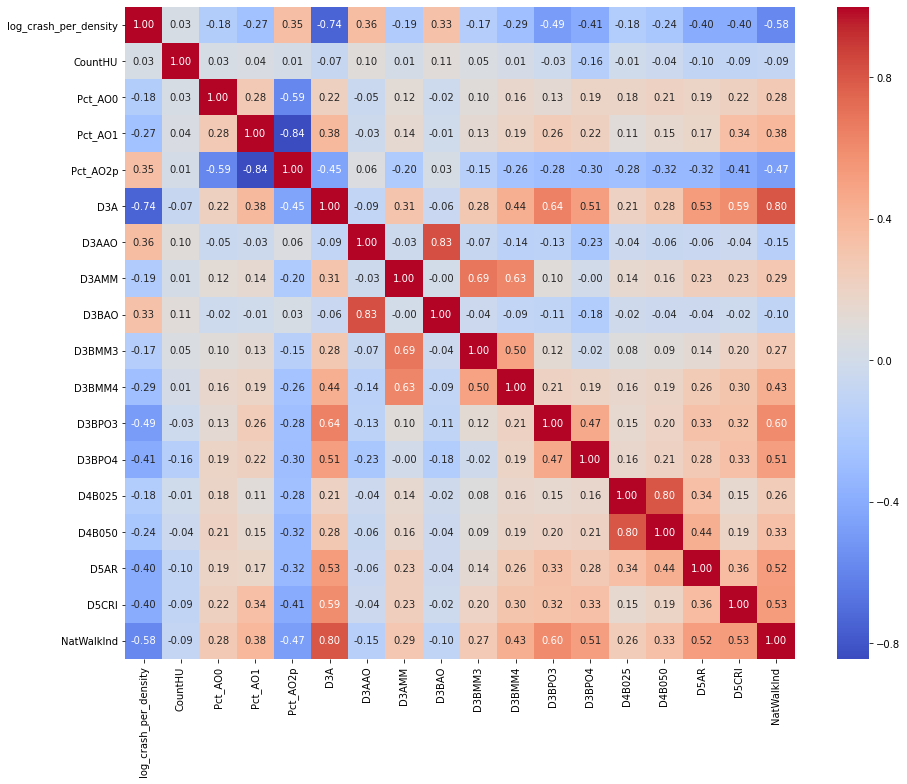

In [7]:
# Let's visualize with a heatmap

corr = df[['log_crash_per_density', 'CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd']].corr()
plt.figure(figsize = (15,12))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

In [12]:
# Let's create the test-train spit and save each dataset seperately

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=831)

# Save each set to a separate CSV file
df_train.to_csv('cbg_no2020_gt3crashes_feature_select_trans_train.csv', index=False)
df_test.to_csv('cbg_no2020_gt3crashes_feature_select_trans_test.csv', index=False)